In [627]:
import pandas as pd

In [628]:
btc_data = pd.read_csv("btc_five_years_daily_datacsv.csv")

In [629]:
btc_data

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 17, 2023","28,576.7","28,726.1","28,771.8","28,381.0",53.52K,-0.52%
1,"Aug 16, 2023","28,726.3","29,195.3","29,251.1","28,717.6",43.71K,-1.61%
2,"Aug 15, 2023","29,195.3","29,426.7","29,472.0","29,118.6",33.81K,-0.79%
3,"Aug 14, 2023","29,426.7","29,300.1","29,689.0","29,116.0",39.30K,0.43%
4,"Aug 13, 2023","29,300.1","29,428.2","29,468.5","29,272.3",13.49K,-0.44%
...,...,...,...,...,...,...,...
1822,"Aug 21, 2018","6,482.2","6,268.1","6,484.1","6,257.4",1.46M,3.41%
1823,"Aug 20, 2018","6,268.1","6,474.2","6,516.4","6,255.9",3.10M,-3.29%
1824,"Aug 19, 2018","6,481.5","6,379.1","6,534.8","6,316.0",2.71M,1.61%
1825,"Aug 18, 2018","6,379.1","6,581.8","6,626.4","6,295.5",3.15M,-3.08%


In [630]:
df = btc_data.copy()

## 1. Project/Data Review

- Independent values: *'Date', 'Price', 'Open', High', 'Low', 'Vol.'*
- Target value: *'Change %'*

In [631]:
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [632]:
df['Date'] = pd.to_datetime(df['Date'])

In [633]:
df.dtypes

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

In [634]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-08-17,"28,576.7","28,726.1","28,771.8","28,381.0",53.52K,-0.52%
1,2023-08-16,"28,726.3","29,195.3","29,251.1","28,717.6",43.71K,-1.61%
2,2023-08-15,"29,195.3","29,426.7","29,472.0","29,118.6",33.81K,-0.79%
3,2023-08-14,"29,426.7","29,300.1","29,689.0","29,116.0",39.30K,0.43%
4,2023-08-13,"29,300.1","29,428.2","29,468.5","29,272.3",13.49K,-0.44%
...,...,...,...,...,...,...,...
1822,2018-08-21,"6,482.2","6,268.1","6,484.1","6,257.4",1.46M,3.41%
1823,2018-08-20,"6,268.1","6,474.2","6,516.4","6,255.9",3.10M,-3.29%
1824,2018-08-19,"6,481.5","6,379.1","6,534.8","6,316.0",2.71M,1.61%
1825,2018-08-18,"6,379.1","6,581.8","6,626.4","6,295.5",3.15M,-3.08%


In [635]:
# df2 = df.set_index('Date')
# df2

## 2. Data Preprocessing

In [636]:
df.rename(columns={'Vol.': 'Vol',
                   'Change %': 'Change'}, inplace=True)

In [637]:
df

,Date,Price,Open,High,Low,Vol,Change
0,2023-08-17,"28,576.7","28,726.1","28,771.8","28,381.0",53.52K,-0.52%
1,2023-08-16,"28,726.3","29,195.3","29,251.1","28,717.6",43.71K,-1.61%
2,2023-08-15,"29,195.3","29,426.7","29,472.0","29,118.6",33.81K,-0.79%
3,2023-08-14,"29,426.7","29,300.1","29,689.0","29,116.0",39.30K,0.43%
4,2023-08-13,"29,300.1","29,428.2","29,468.5","29,272.3",13.49K,-0.44%
...,...,...,...,...,...,...,...
1822,2018-08-21,"6,482.2","6,268.1","6,484.1","6,257.4",1.46M,3.41%
1823,2018-08-20,"6,268.1","6,474.2","6,516.4","6,255.9",3.10M,-3.29%
1824,2018-08-19,"6,481.5","6,379.1","6,534.8","6,316.0",2.71M,1.61%
1825,2018-08-18,"6,379.1","6,581.8","6,626.4","6,295.5",3.15M,-3.08%


### "Price, Open, High, Low" Cleaning / Float Transformation

In [638]:
columns = ['Price', 'Open', 'High', 'Low']
rows = range(0, len(df))

for col in columns:
    for row in rows:
        df.loc[row,col] = df.loc[row, col].replace(",", "")   

df[columns] = df[columns].astype(float)

In [639]:
df.dtypes

Date      datetime64[ns]
Price            float64
Open             float64
High             float64
Low              float64
Vol               object
Change            object
dtype: object

### "Vol" convert the K-M view to float

In [640]:
df['Vol_Abb'] = ''
for row in range(len(df)):
    value = df.loc[row, 'Vol']
    df.loc[row, 'Vol'] = value[:-1]
    df.iloc[row, -1] = value[-1]

df['Vol'] = df['Vol'].astype(float)

In [641]:
df.dtypes

Date       datetime64[ns]
Price             float64
Open              float64
High              float64
Low               float64
Vol               float64
Change             object
Vol_Abb            object
dtype: object

In [642]:
df['Vol_Abb'].unique()

array(['K', 'M', 'B'], dtype=object)

In [643]:
df

,Date,Price,Open,High,Low,Vol,Change,Vol_Abb
0,2023-08-17,28576.70,28726.10,28771.80,28381.00,53.52,-0.52%,K
1,2023-08-16,28726.30,29195.30,29251.10,28717.60,43.71,-1.61%,K
2,2023-08-15,29195.30,29426.70,29472.00,29118.60,33.81,-0.79%,K
3,2023-08-14,29426.70,29300.10,29689.00,29116.00,39.30,0.43%,K
4,2023-08-13,29300.10,29428.20,29468.50,29272.30,13.49,-0.44%,K
...,...,...,...,...,...,...,...,...
1822,2018-08-21,6482.20,6268.10,6484.10,6257.40,1.46,3.41%,M
1823,2018-08-20,6268.10,6474.20,6516.40,6255.90,3.10,-3.29%,M
1824,2018-08-19,6481.50,6379.10,6534.80,6316.00,2.71,1.61%,M
1825,2018-08-18,6379.10,6581.80,6626.40,6295.50,3.15,-3.08%,M


In [644]:
for row in range(len(df)):
    if df.loc[row, 'Vol_Abb'] == 'K': df.loc[row, 'Vol'] = df.loc[row, 'Vol'] * 1000
    elif df.loc[row, 'Vol_Abb'] == 'M': df.loc[row, 'Vol'] = df.loc[row, 'Vol'] *1000000
    else: df.loc[row, 'Vol'] = df.loc[row, 'Vol'] * 1000000000

In [645]:
df = df.drop('Vol_Abb', axis = 1)

In [646]:
df

,Date,Price,Open,High,Low,Vol,Change
0,2023-08-17,28576.70,28726.10,28771.80,28381.00,53520.00,-0.52%
1,2023-08-16,28726.30,29195.30,29251.10,28717.60,43710.00,-1.61%
2,2023-08-15,29195.30,29426.70,29472.00,29118.60,33810.00,-0.79%
3,2023-08-14,29426.70,29300.10,29689.00,29116.00,39300.00,0.43%
4,2023-08-13,29300.10,29428.20,29468.50,29272.30,13490.00,-0.44%
...,...,...,...,...,...,...,...
1822,2018-08-21,6482.20,6268.10,6484.10,6257.40,1460000.00,3.41%
1823,2018-08-20,6268.10,6474.20,6516.40,6255.90,3100000.00,-3.29%
1824,2018-08-19,6481.50,6379.10,6534.80,6316.00,2710000.00,1.61%
1825,2018-08-18,6379.10,6581.80,6626.40,6295.50,3150000.00,-3.08%


In [647]:
for row in range(len(df)):
    df.loc[row, 'Change'] = df.loc[row, 'Change'].replace('%', '')
df['Change'] = df['Change'].astype(float)
df

,Date,Price,Open,High,Low,Vol,Change
0,2023-08-17,28576.70,28726.10,28771.80,28381.00,53520.00,-0.52
1,2023-08-16,28726.30,29195.30,29251.10,28717.60,43710.00,-1.61
2,2023-08-15,29195.30,29426.70,29472.00,29118.60,33810.00,-0.79
3,2023-08-14,29426.70,29300.10,29689.00,29116.00,39300.00,0.43
4,2023-08-13,29300.10,29428.20,29468.50,29272.30,13490.00,-0.44
...,...,...,...,...,...,...,...
1822,2018-08-21,6482.20,6268.10,6484.10,6257.40,1460000.00,3.41
1823,2018-08-20,6268.10,6474.20,6516.40,6255.90,3100000.00,-3.29
1824,2018-08-19,6481.50,6379.10,6534.80,6316.00,2710000.00,1.61
1825,2018-08-18,6379.10,6581.80,6626.40,6295.50,3150000.00,-3.08


### Visualization with candle chart

In [648]:
import mplfinance as mpf

In [649]:
df2 = df.set_index('Date')
df2.rename(columns={'Price': 'Close'}, inplace=True)

In [650]:
df3 = df2.iloc[:1800,:]

In [651]:
df4 = df3.sort_index()

In [652]:
df4

,Close,Open,High,Low,Vol,Change
Date,,,,,,
2018-09-13,6482.90,6338.00,6867.30,6337.80,3530000.00,2.29
2018-09-14,6483.70,6482.90,6579.40,6412.10,3200000.00,0.01
2018-09-15,6519.00,6482.60,6562.90,6470.30,3160000.00,0.54
2018-09-16,6500.20,6519.00,6520.80,6406.20,3340000.00,-0.29
2018-09-17,6251.90,6500.20,6533.50,6215.90,3260000.00,-3.82
...,...,...,...,...,...,...
2023-08-13,29300.10,29428.20,29468.50,29272.30,13490.00,-0.44
2023-08-14,29426.70,29300.10,29689.00,29116.00,39300.00,0.43
2023-08-15,29195.30,29426.70,29472.00,29118.60,33810.00,-0.79


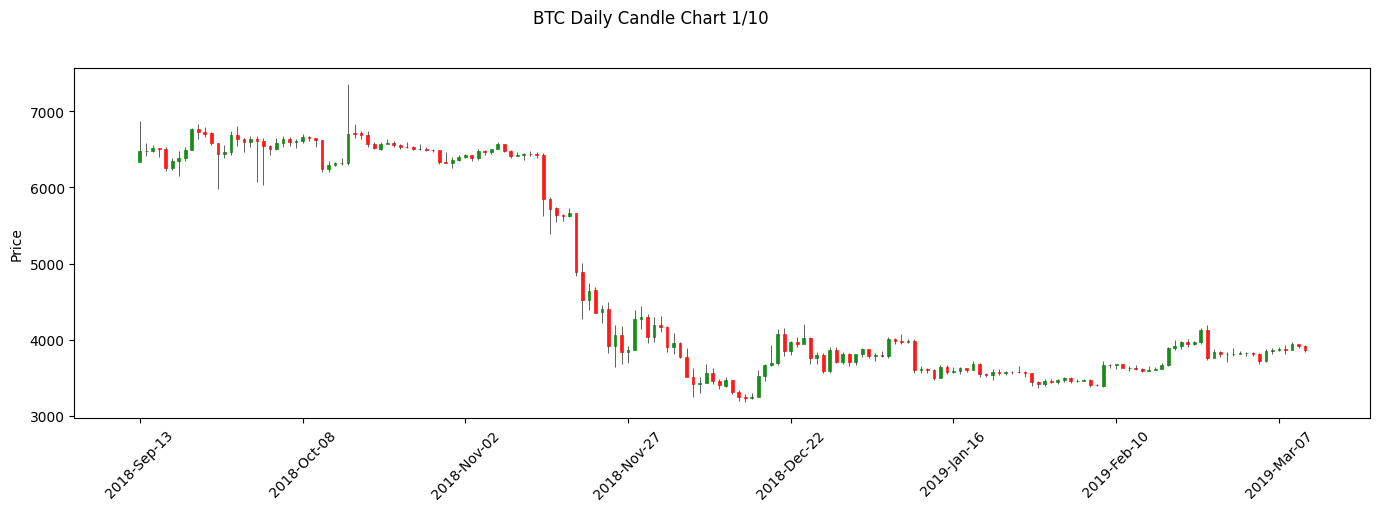

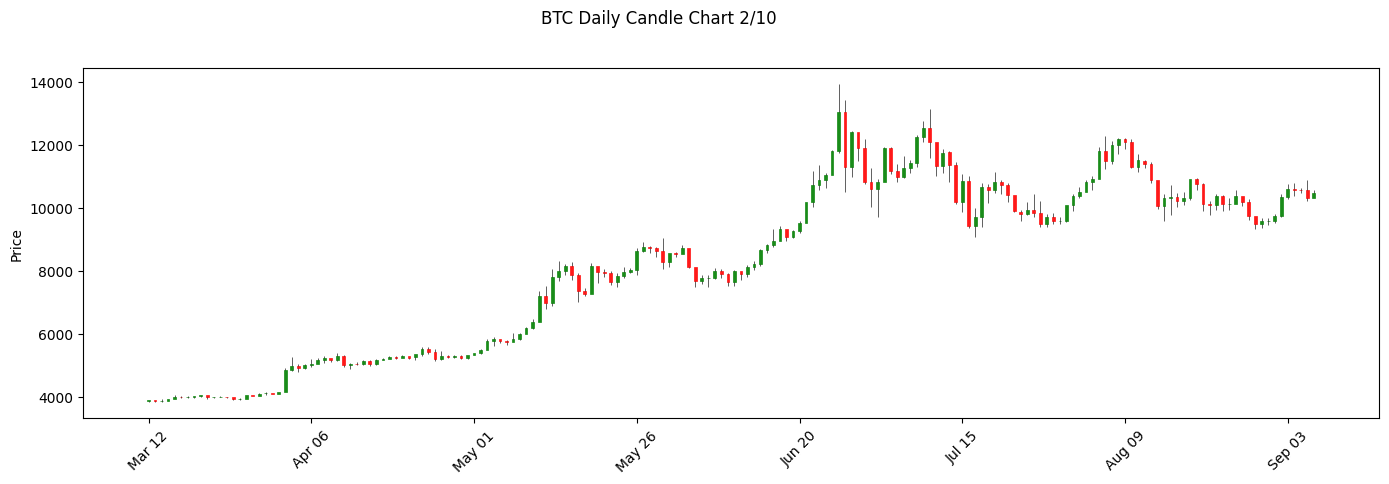

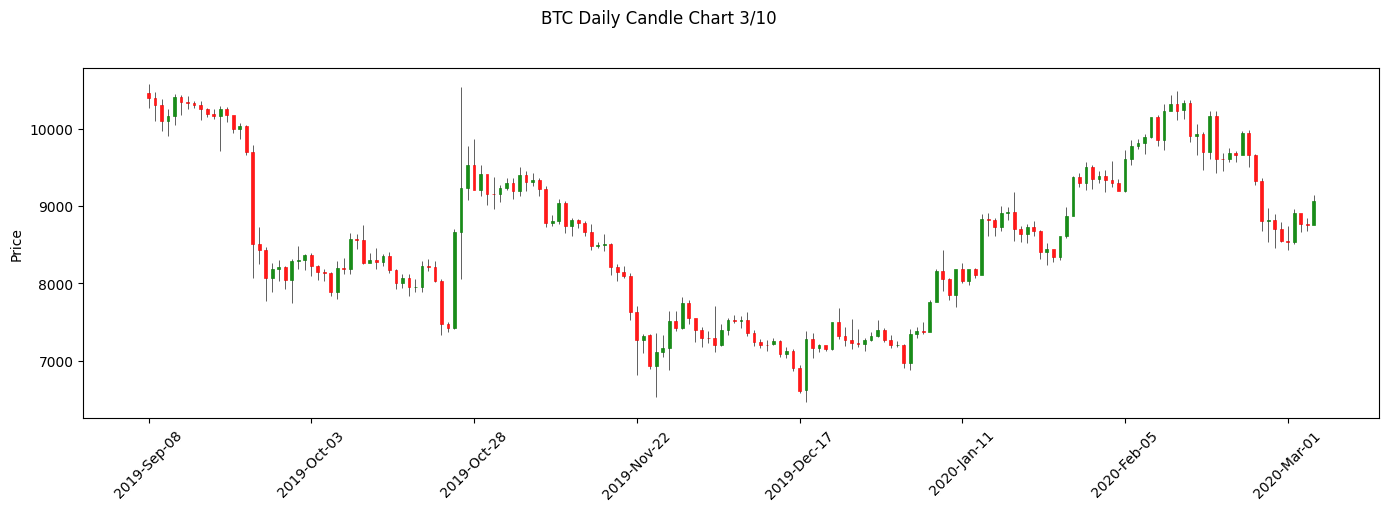

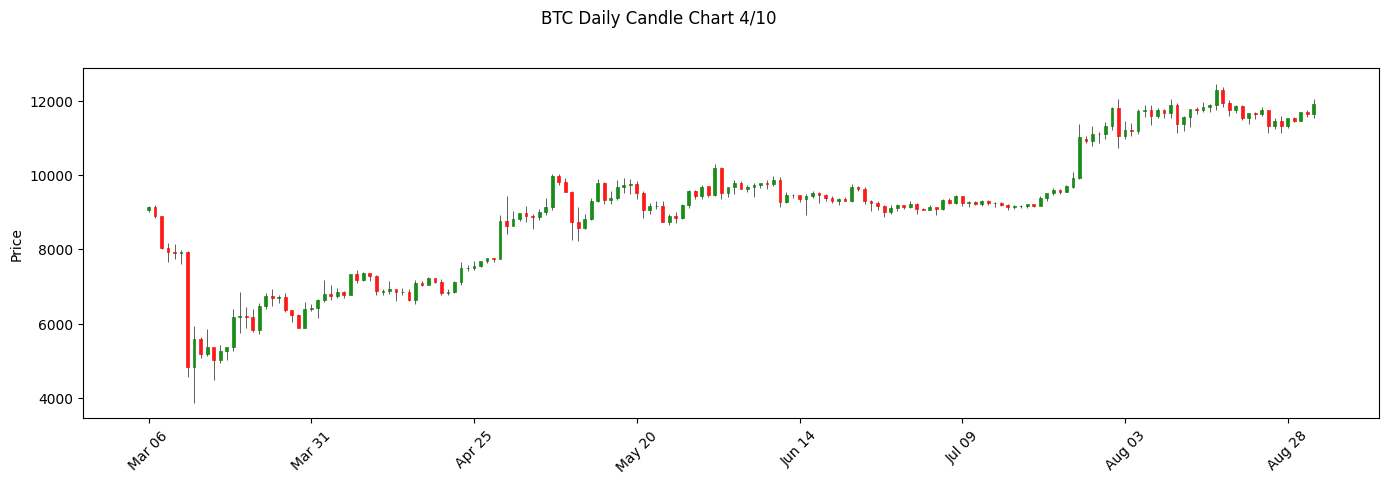

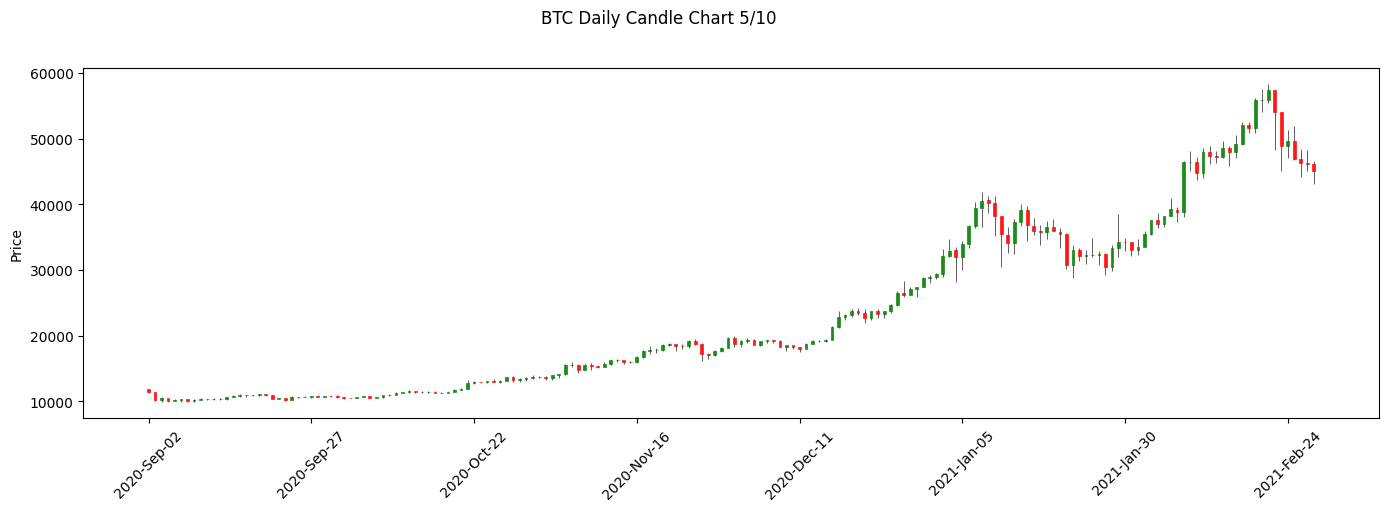

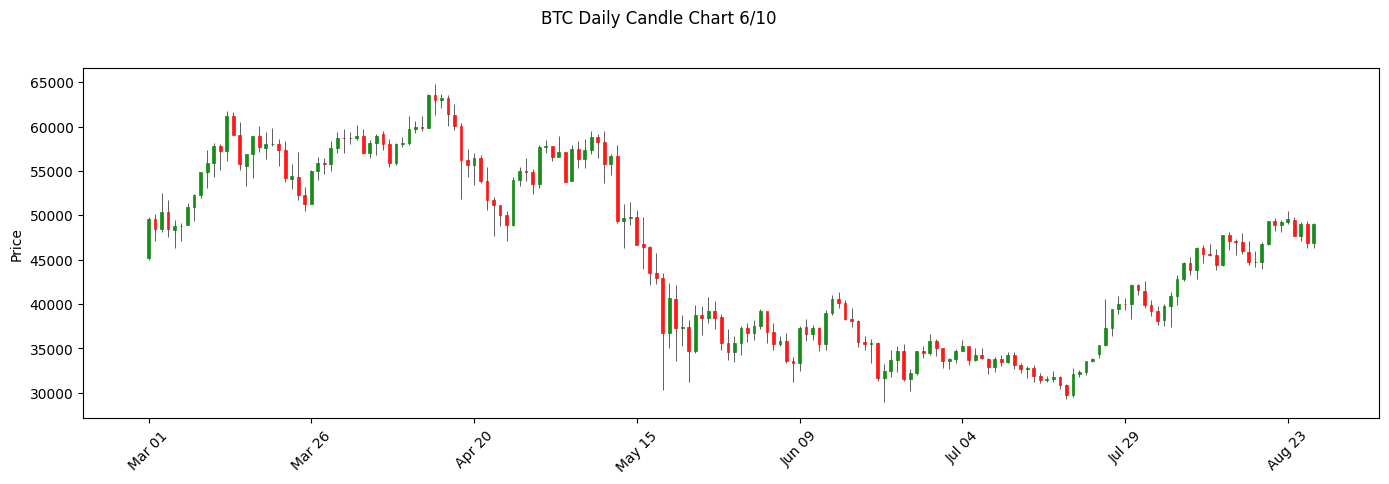

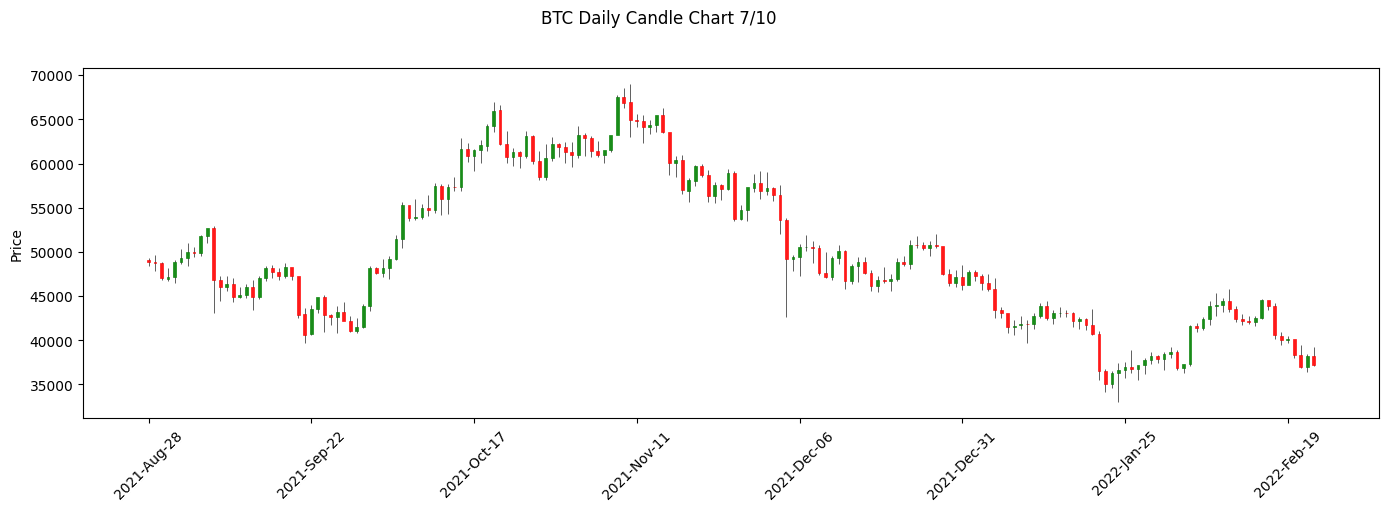

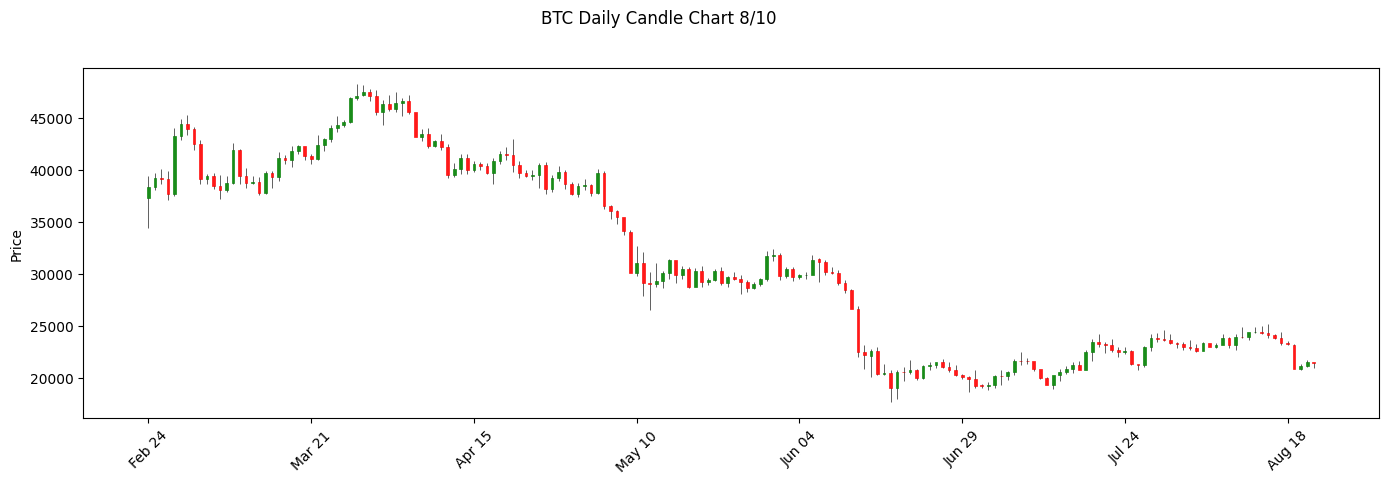

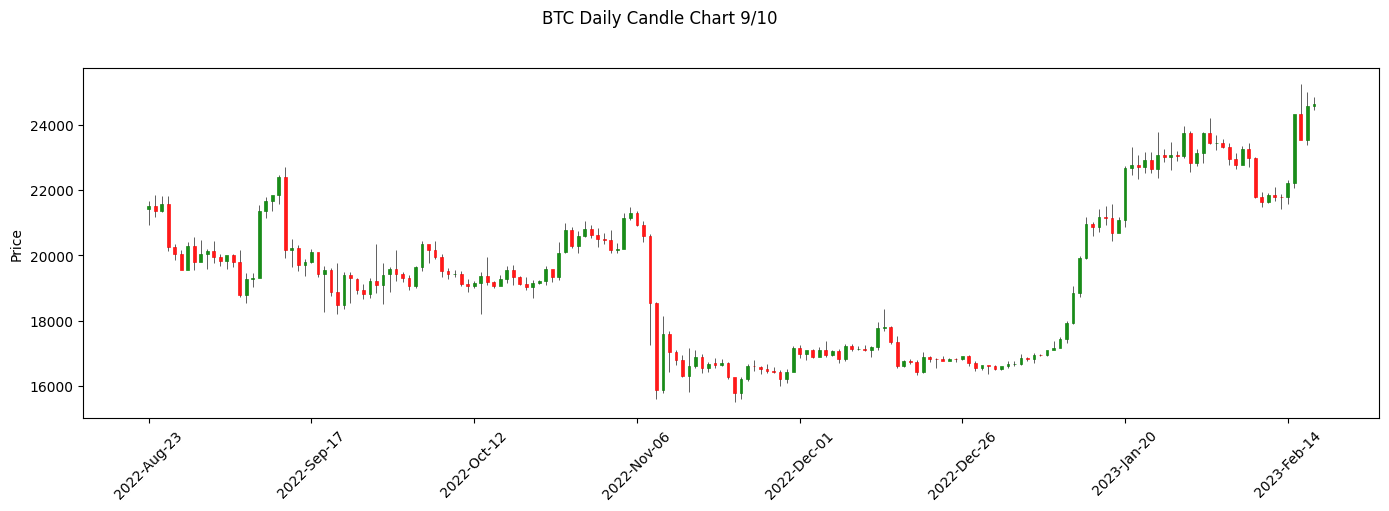

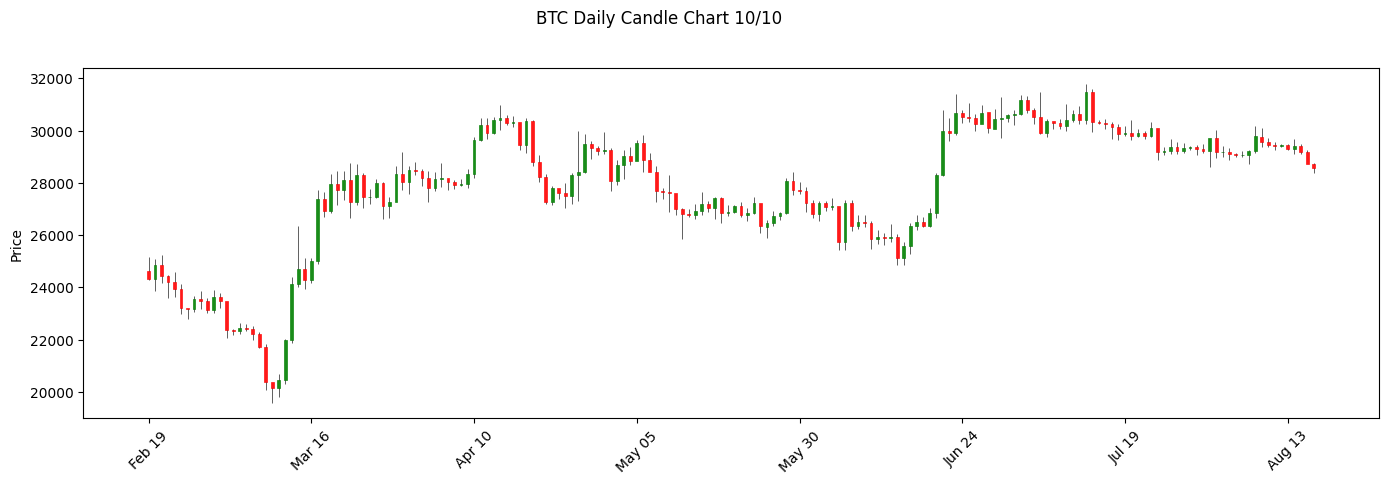

In [653]:
for part in range(10):
    select_start = part * int(len(df4)/10)
    select_end = select_start + int(len(df4)/10)
    
    # Create a style for the candlesticks with green and red colors
    mc = mpf.make_marketcolors(up='g', down='r', edge={'up': 'g', 'down': 'r'})
    s = mpf.make_mpf_style(marketcolors=mc)
   
    mpf.plot(
        df4.iloc[select_start:select_end,:], 
        type = 'candle',
        title=f'BTC Daily Candle Chart {part+1}/10',
        ylabel = 'Price', 
        figsize = (18,5),
        style=s

    );

## Adding Indicators into DataFrame

### Ichimoku

https://school.stockcharts.com/doku.php?id=technical_indicators:ichimoku_cloud

In [654]:
from ta.trend import IchimokuIndicator 

In [655]:
ich_lines = IchimokuIndicator(
    high = df4.High,
    low = df4.Low)

df4['ich_base_line'] = ich_lines.ichimoku_base_line()
df4['ich_conv_line'] = ich_lines.ichimoku_conversion_line()

In [656]:
# value_series = pd.Series(data['value'], index=index)
# shifted_value_series = value_series.copy()
# shifted_value_series.index = shifted_value_series.index + pd.DateOffset(days=3)

df_ich_span = df4.copy()
df_ich_span.index = df_ich_span.index + pd.DateOffset(days=25)

ich_spans = IchimokuIndicator(
    high = df_ich_span.High,
    low = df_ich_span.Low)

series_ich_a = ich_spans.ichimoku_a()
series_ich_b = ich_spans.ichimoku_b()

In [657]:
df5 = pd.concat([df4, series_ich_a], axis=1, join = 'inner')
df5 = pd.concat([df5, series_ich_b], axis=1, join = 'inner')
df5 = df5.rename(columns={'ichimoku_a_9_26': 'ich_span_a', 'ichimoku_b_9_26': 'ich_span_b'})


In [658]:
df5.tail(5)

,Close,Open,High,Low,Vol,Change,ich_base_line,ich_conv_line,ich_span_a,ich_span_b
Date,,,,,,,,,,
2023-08-13,29300.10,29428.20,29468.50,29272.30,13490.00,-0.44,29509.50,29444.80,30694.55,28301.25
2023-08-14,29426.70,29300.10,29689.00,29116.00,39300.00,0.43,29509.50,29444.80,30692.95,28301.25
2023-08-15,29195.30,29426.70,29472.00,29118.60,33810.00,-0.79,29474.00,29444.80,30692.95,28301.25
2023-08-16,28726.30,29195.30,29251.10,28717.60,43710.00,-1.61,29474.00,29443.10,30652.47,28301.25
2023-08-17,28576.70,28726.10,28771.80,28381.00,53520.00,-0.52,29359.00,29242.50,30360.58,28301.25


In [659]:
df6 = df5.iloc[-60:,:]


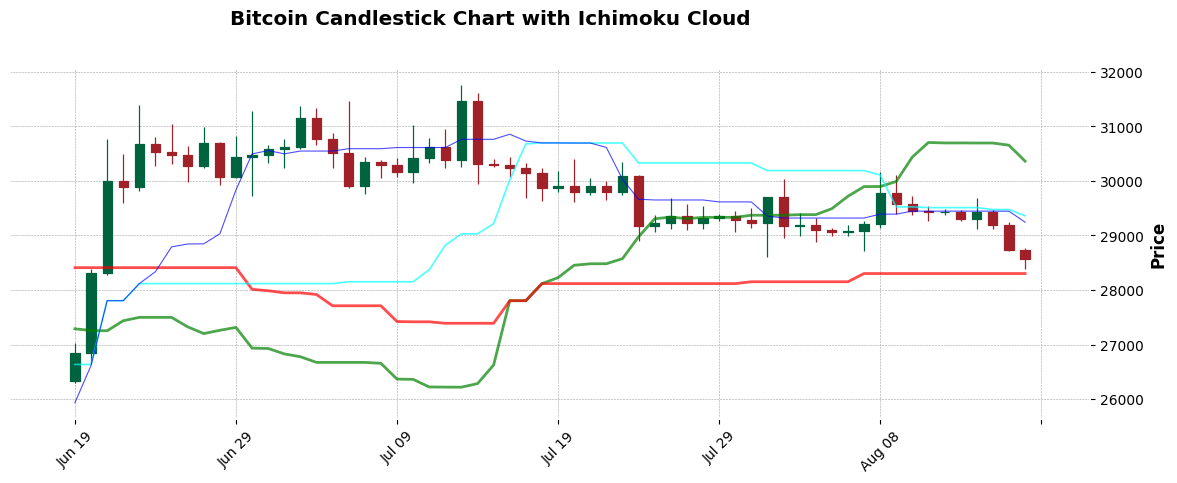

In [660]:
# Ichimoku bulut renkleri
def ichimoku_btc_chart_60days(fs1, fs2):
    cloud_color = mpf.make_marketcolors(up='g', down='r', inherit=True)

    # Ichimoku verileri
    ichimoku = [
        mpf.make_addplot(df6['ich_span_a'], color='green',width=2.0, alpha=0.7),
        mpf.make_addplot(df6['ich_span_b'], color='red',width=2.0, alpha=0.7),
        mpf.make_addplot(df6['ich_base_line'], color='cyan', width=1.2, alpha=0.7),
        mpf.make_addplot(df6['ich_conv_line'], color='blue', width=0.8, alpha=0.7)
    ]

    # Grafik çizimi
    mpf.plot(
        df6, 
        type='candle', 
        addplot=ichimoku, 
        style='charles', 
        title='Bitcoin Candlestick Chart with Ichimoku Cloud', 
        ylabel='Price',
        figsize = (fs1,fs2)
    )
ichimoku_btc_chart_60days(15,5)


### Moving Average Convergence Divergence (MACD)

In [661]:
from ta.trend import MACD

macd = MACD(close = df5.Close)

In [662]:
df5

,Close,Open,High,Low,Vol,Change,ich_base_line,ich_conv_line,ich_span_a,ich_span_b
Date,,,,,,,,,,
2018-10-08,6669.60,6611.00,6699.50,6589.90,119680.00,0.89,6422.15,6367.20,NaN,6602.55
2018-10-09,6650.80,6669.60,6678.90,6613.30,80790.00,-0.28,6405.15,6367.20,NaN,6602.55
2018-10-10,6618.00,6650.60,6653.50,6526.00,101930.00,-0.49,6405.15,6367.20,NaN,6602.55
2018-10-11,6239.10,6618.00,6622.50,6206.20,245280.00,-5.72,6405.15,6452.85,NaN,6602.55
2018-10-12,6291.30,6239.20,6344.80,6206.80,147400.00,0.84,6405.15,6452.85,NaN,6541.60
...,...,...,...,...,...,...,...,...,...,...
2023-08-13,29300.10,29428.20,29468.50,29272.30,13490.00,-0.44,29509.50,29444.80,30694.55,28301.25
2023-08-14,29426.70,29300.10,29689.00,29116.00,39300.00,0.43,29509.50,29444.80,30692.95,28301.25
2023-08-15,29195.30,29426.70,29472.00,29118.60,33810.00,-0.79,29474.00,29444.80,30692.95,28301.25


In [663]:
df5['macd_line'] = macd.macd()
df5['macd_signal'] = macd.macd_signal()
df5['macd_hist'] = macd.macd_diff()

In [664]:
df5

,Close,Open,High,Low,Vol,Change,ich_base_line,ich_conv_line,ich_span_a,ich_span_b,macd_line,macd_signal,macd_hist
Date,,,,,,,,,,,,,
2018-10-08,6669.60,6611.00,6699.50,6589.90,119680.00,0.89,6422.15,6367.20,NaN,6602.55,NaN,NaN,NaN
2018-10-09,6650.80,6669.60,6678.90,6613.30,80790.00,-0.28,6405.15,6367.20,NaN,6602.55,NaN,NaN,NaN
2018-10-10,6618.00,6650.60,6653.50,6526.00,101930.00,-0.49,6405.15,6367.20,NaN,6602.55,NaN,NaN,NaN
2018-10-11,6239.10,6618.00,6622.50,6206.20,245280.00,-5.72,6405.15,6452.85,NaN,6602.55,NaN,NaN,NaN
2018-10-12,6291.30,6239.20,6344.80,6206.80,147400.00,0.84,6405.15,6452.85,NaN,6541.60,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-13,29300.10,29428.20,29468.50,29272.30,13490.00,-0.44,29509.50,29444.80,30694.55,28301.25,-71.86,-96.16,24.30
2023-08-14,29426.70,29300.10,29689.00,29116.00,39300.00,0.43,29509.50,29444.80,30692.95,28301.25,-63.55,-89.64,26.09
2023-08-15,29195.30,29426.70,29472.00,29118.60,33810.00,-0.79,29474.00,29444.80,30692.95,28301.25,-74.78,-86.67,11.89


In [665]:
df6 = df5.iloc[-60:,:]

In [666]:
import matplotlib.pyplot as plt

def macd_btc_chart_60days(fs1,fs2):
    plt.figure(figsize=(fs1, fs2))

    plt.plot(df6.index, df6['macd_line'], label='MACD Line', color='blue')
    plt.plot(df6.index, df6['macd_signal'], label='MACD Signal', color='orange')

    plt.bar(df6.index, df6['macd_hist'], label='Histogram', color='gray', alpha=0.5)
    plt.title('MACD')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()

    plt.show()

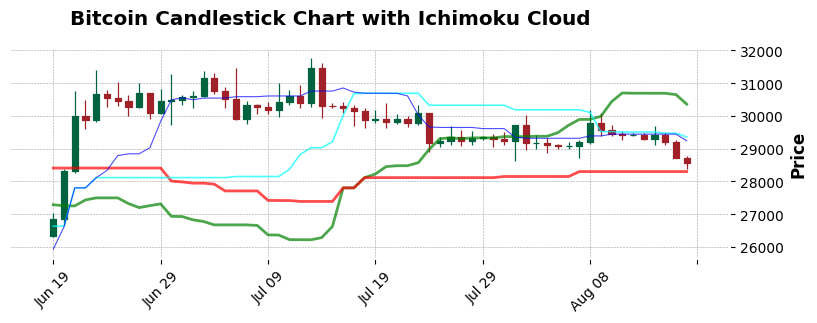

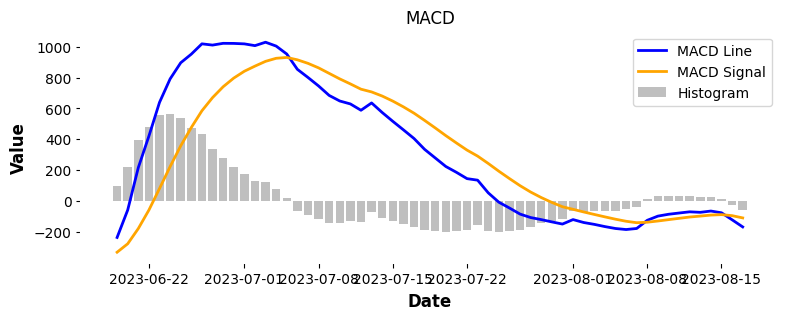

In [667]:
ichimoku_btc_chart_60days(10,3)
macd_btc_chart_60days(9,3)

### Relative Strength Index (RSI)

In [668]:
from ta.momentum import RSIIndicator

rsi = RSIIndicator(close=df5.Close)

df5['rsi'] = rsi.rsi()

In [669]:
df5

,Close,Open,High,Low,Vol,Change,ich_base_line,ich_conv_line,ich_span_a,ich_span_b,macd_line,macd_signal,macd_hist,rsi
Date,,,,,,,,,,,,,,
2018-10-08,6669.60,6611.00,6699.50,6589.90,119680.00,0.89,6422.15,6367.20,NaN,6602.55,NaN,NaN,NaN,NaN
2018-10-09,6650.80,6669.60,6678.90,6613.30,80790.00,-0.28,6405.15,6367.20,NaN,6602.55,NaN,NaN,NaN,NaN
2018-10-10,6618.00,6650.60,6653.50,6526.00,101930.00,-0.49,6405.15,6367.20,NaN,6602.55,NaN,NaN,NaN,NaN
2018-10-11,6239.10,6618.00,6622.50,6206.20,245280.00,-5.72,6405.15,6452.85,NaN,6602.55,NaN,NaN,NaN,NaN
2018-10-12,6291.30,6239.20,6344.80,6206.80,147400.00,0.84,6405.15,6452.85,NaN,6541.60,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-13,29300.10,29428.20,29468.50,29272.30,13490.00,-0.44,29509.50,29444.80,30694.55,28301.25,-71.86,-96.16,24.30,46.67
2023-08-14,29426.70,29300.10,29689.00,29116.00,39300.00,0.43,29509.50,29444.80,30692.95,28301.25,-63.55,-89.64,26.09,49.29
2023-08-15,29195.30,29426.70,29472.00,29118.60,33810.00,-0.79,29474.00,29444.80,30692.95,28301.25,-74.78,-86.67,11.89,44.94


In [670]:
df6 = df5.iloc[-60:,:]

In [671]:
def rsi_btc_chart_60days(fs1,fs2):
    plt.figure(figsize=(fs1, fs2))

    plt.plot(df6.index, [0]*len(df6), label='RSI Bottom', color='gray', linestyle='-', alpha=0.5)
    plt.plot(df6.index, [100]*len(df6), label='RSI Top', color='gray', linestyle='-', alpha=0.5)
    plt.plot(df6.index, [30]*len(df6), label='RSI Down 0.3', color='purple', linestyle='--', alpha=0.5)
    plt.plot(df6.index, [70]*len(df6), label='RSI Up 0.7', color='purple', linestyle='--', alpha=0.5)

    plt.plot(df6.index, df6.rsi, label='RSI', color='purple')

    plt.show()


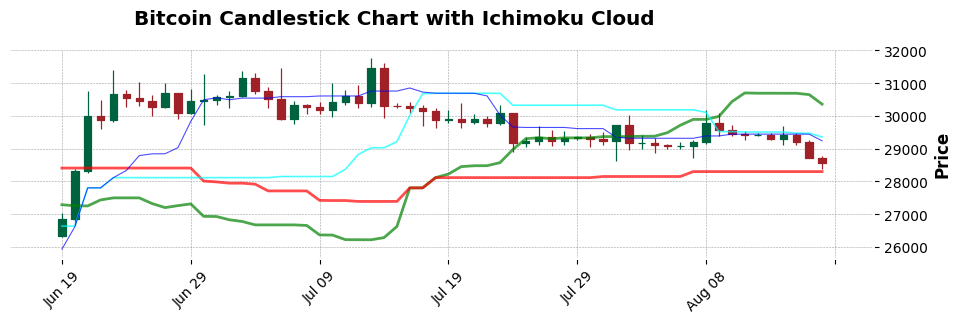

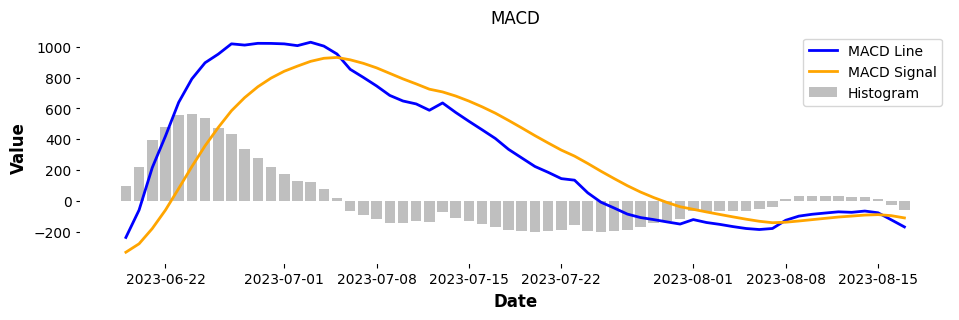

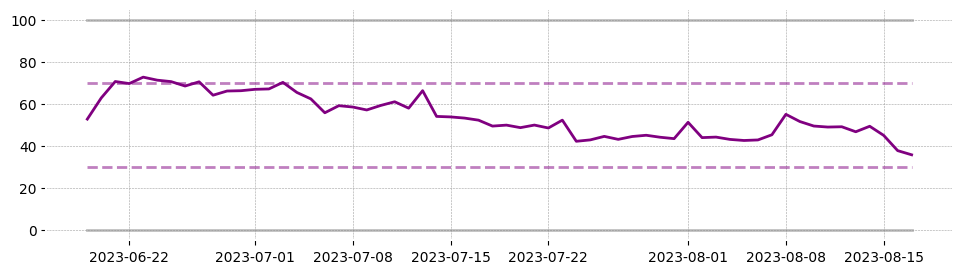

In [672]:
ichimoku_btc_chart_60days(12,3)
macd_btc_chart_60days(11.2,3)
rsi_btc_chart_60days(11.7,3)

In [673]:
df6 = df5.drop('Change', axis=1)

In [674]:
df6

,Close,Open,High,Low,Vol,ich_base_line,ich_conv_line,ich_span_a,ich_span_b,macd_line,macd_signal,macd_hist,rsi
Date,,,,,,,,,,,,,
2018-10-08,6669.60,6611.00,6699.50,6589.90,119680.00,6422.15,6367.20,NaN,6602.55,NaN,NaN,NaN,NaN
2018-10-09,6650.80,6669.60,6678.90,6613.30,80790.00,6405.15,6367.20,NaN,6602.55,NaN,NaN,NaN,NaN
2018-10-10,6618.00,6650.60,6653.50,6526.00,101930.00,6405.15,6367.20,NaN,6602.55,NaN,NaN,NaN,NaN
2018-10-11,6239.10,6618.00,6622.50,6206.20,245280.00,6405.15,6452.85,NaN,6602.55,NaN,NaN,NaN,NaN
2018-10-12,6291.30,6239.20,6344.80,6206.80,147400.00,6405.15,6452.85,NaN,6541.60,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-13,29300.10,29428.20,29468.50,29272.30,13490.00,29509.50,29444.80,30694.55,28301.25,-71.86,-96.16,24.30,46.67
2023-08-14,29426.70,29300.10,29689.00,29116.00,39300.00,29509.50,29444.80,30692.95,28301.25,-63.55,-89.64,26.09,49.29
2023-08-15,29195.30,29426.70,29472.00,29118.60,33810.00,29474.00,29444.80,30692.95,28301.25,-74.78,-86.67,11.89,44.94


Let's create a new 'change' column that shows the percentage difference between the next day's closing price and the current line's closing price!

In [675]:
df6['Change'] = ((df6['Close'].shift(-1) - df6['Close']) * 100 / df6['Close']).round(2)
df6

,Close,Open,High,Low,Vol,ich_base_line,ich_conv_line,ich_span_a,ich_span_b,macd_line,macd_signal,macd_hist,rsi,Change
Date,,,,,,,,,,,,,,
2018-10-08,6669.60,6611.00,6699.50,6589.90,119680.00,6422.15,6367.20,NaN,6602.55,NaN,NaN,NaN,NaN,-0.28
2018-10-09,6650.80,6669.60,6678.90,6613.30,80790.00,6405.15,6367.20,NaN,6602.55,NaN,NaN,NaN,NaN,-0.49
2018-10-10,6618.00,6650.60,6653.50,6526.00,101930.00,6405.15,6367.20,NaN,6602.55,NaN,NaN,NaN,NaN,-5.73
2018-10-11,6239.10,6618.00,6622.50,6206.20,245280.00,6405.15,6452.85,NaN,6602.55,NaN,NaN,NaN,NaN,0.84
2018-10-12,6291.30,6239.20,6344.80,6206.80,147400.00,6405.15,6452.85,NaN,6541.60,NaN,NaN,NaN,NaN,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-13,29300.10,29428.20,29468.50,29272.30,13490.00,29509.50,29444.80,30694.55,28301.25,-71.86,-96.16,24.30,46.67,0.43
2023-08-14,29426.70,29300.10,29689.00,29116.00,39300.00,29509.50,29444.80,30692.95,28301.25,-63.55,-89.64,26.09,49.29,-0.79
2023-08-15,29195.30,29426.70,29472.00,29118.60,33810.00,29474.00,29444.80,30692.95,28301.25,-74.78,-86.67,11.89,44.94,-1.61


In [676]:
df7 = df6.iloc[33:-1,:] # Eleminated Null Rows by Indicators 

In [677]:
df7

,Close,Open,High,Low,Vol,ich_base_line,ich_conv_line,ich_span_a,ich_span_b,macd_line,macd_signal,macd_hist,rsi,Change
Date,,,,,,,,,,,,,,
2018-11-10,6427.10,6411.90,6461.70,6411.70,115870.00,6547.25,6470.25,6725.00,6667.70,-25.08,-33.41,8.33,45.24,0.30
2018-11-11,6446.10,6427.10,6451.70,6359.00,127400.00,6501.85,6470.25,6725.00,6667.70,-24.05,-31.54,7.49,46.94,-0.17
2018-11-12,6435.00,6445.00,6475.90,6409.40,130160.00,6497.05,6476.65,6725.00,6667.70,-23.85,-30.00,6.15,46.04,-0.09
2018-11-13,6429.20,6435.00,6466.80,6386.70,137600.00,6450.45,6476.65,6725.00,6667.70,-23.88,-28.77,4.89,45.55,-9.13
2018-11-14,5842.40,6428.90,6453.30,5619.20,438210.00,6131.15,6106.75,6725.15,6667.70,-70.45,-37.11,-33.34,21.07,-2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-12,29428.20,29420.80,29480.80,29375.40,11070.00,29509.50,29444.80,30694.55,28301.25,-68.53,-102.24,33.71,49.06,-0.44
2023-08-13,29300.10,29428.20,29468.50,29272.30,13490.00,29509.50,29444.80,30694.55,28301.25,-71.86,-96.16,24.30,46.67,0.43
2023-08-14,29426.70,29300.10,29689.00,29116.00,39300.00,29509.50,29444.80,30692.95,28301.25,-63.55,-89.64,26.09,49.29,-0.79


In [678]:
pd.set_option('display.float_format', '{:.2f}'.format)
df7.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1741.00,23307.19,16502.63,3228.70,9229.90,19548.20,35391.10,67527.90
Open,1741.00,23294.60,16507.17,3228.60,9223.60,19538.90,35392.30,67528.70
High,1741.00,23871.73,16947.88,3282.30,9363.00,20043.80,36388.60,68990.60
Low,1741.00,22663.19,15996.75,3177.00,9081.00,19116.10,33444.50,66334.90
Vol,1741.00,35220725.35,260975790.15,260.00,88080.00,267250.00,617350.00,4470000000.00
ich_base_line,1741.00,23108.73,16252.36,3541.70,9161.80,19832.25,35109.90,63551.60
ich_conv_line,1741.00,23185.18,16376.41,3427.30,9194.90,19562.70,35063.10,65168.90
ich_span_a,1741.00,22815.22,16382.69,3491.52,8969.40,19221.47,34657.32,64360.25
ich_span_b,1741.00,22703.89,16141.03,3692.60,8683.35,18787.75,36850.75,61233.50
macd_line,1741.00,92.38,1259.26,-5068.34,-353.42,21.81,520.67,5248.55


In [679]:
df7

,Close,Open,High,Low,Vol,ich_base_line,ich_conv_line,ich_span_a,ich_span_b,macd_line,macd_signal,macd_hist,rsi,Change
Date,,,,,,,,,,,,,,
2018-11-10,6427.10,6411.90,6461.70,6411.70,115870.00,6547.25,6470.25,6725.00,6667.70,-25.08,-33.41,8.33,45.24,0.30
2018-11-11,6446.10,6427.10,6451.70,6359.00,127400.00,6501.85,6470.25,6725.00,6667.70,-24.05,-31.54,7.49,46.94,-0.17
2018-11-12,6435.00,6445.00,6475.90,6409.40,130160.00,6497.05,6476.65,6725.00,6667.70,-23.85,-30.00,6.15,46.04,-0.09
2018-11-13,6429.20,6435.00,6466.80,6386.70,137600.00,6450.45,6476.65,6725.00,6667.70,-23.88,-28.77,4.89,45.55,-9.13
2018-11-14,5842.40,6428.90,6453.30,5619.20,438210.00,6131.15,6106.75,6725.15,6667.70,-70.45,-37.11,-33.34,21.07,-2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-12,29428.20,29420.80,29480.80,29375.40,11070.00,29509.50,29444.80,30694.55,28301.25,-68.53,-102.24,33.71,49.06,-0.44
2023-08-13,29300.10,29428.20,29468.50,29272.30,13490.00,29509.50,29444.80,30694.55,28301.25,-71.86,-96.16,24.30,46.67,0.43
2023-08-14,29426.70,29300.10,29689.00,29116.00,39300.00,29509.50,29444.80,30692.95,28301.25,-63.55,-89.64,26.09,49.29,-0.79


{'Dump (<-3)': 225, 'Blinding Red (<-2)': 233, 'Red (<-1)': 249, 'Unstable Up (<0)': 333, 'Unstable Down (>0)': 293, 'Green (>1)': 267, 'Dollar Green (>2)': 268, 'Pump (>3)': 253}


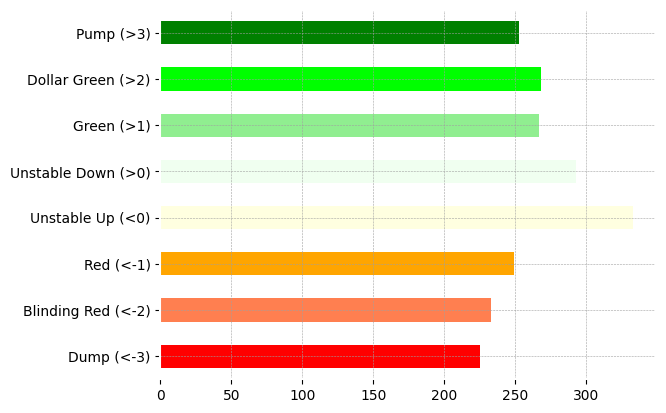

In [680]:
df_change_poz_1 = df7['Change'][(df7['Change'] > 0) & (df7['Change'] <= 1)]
df_change_poz_2 = df7['Change'][(df7['Change'] > 1) & (df7['Change'] <= 2.5)]
df_change_poz_3 = df7['Change'][(df7['Change'] > 2) & (df7['Change'] <= 5)]
df_change_poz_4 = df7['Change'][(df7['Change'] > 3)]
df_change_neg_1 = df7['Change'][(df7['Change'] < 0) & (df7['Change'] >= -1)]
df_change_neg_2 = df7['Change'][(df7['Change'] < -1) & (df7['Change'] >= -2.5)]
df_change_neg_3 = df7['Change'][(df7['Change'] < -2) & (df7['Change'] >= -5)]
df_change_neg_4 = df7['Change'][(df7['Change'] < -3)]

change_distribution_dic= {
    'Dump (<-3)': len(df_change_neg_4),
    'Blinding Red (<-2)': len(df_change_neg_3),
    'Red (<-1)': len(df_change_neg_2),
    'Unstable Up (<0)': len(df_change_neg_1),
    'Unstable Down (>0)': len(df_change_poz_1),
    'Green (>1)': len(df_change_poz_2),
    'Dollar Green (>2)': len(df_change_poz_3),
    'Pump (>3)': len(df_change_poz_4)
} 

print(change_distribution_dic)

change_distribution_series = pd.Series(change_distribution_dic)

change_distribution_series.plot.barh(color=['red'] + ['coral'] + ['orange'] + ['lightyellow'] + ['honeydew'] + ['lightgreen'] + ['lime'] + ['green']);

In [681]:
def classify_change(value):
    if value < -3: return 'Dump'
    elif value < -2: return 'Blinding Red'
    elif value < -1: return 'Red'
    elif value < 0: return 'Unstable Down'
    elif value > 3: return 'Pump'
    elif value > 2: return 'Dollar Green'
    elif value > 1: return 'Green'
    elif value > 0: return 'Unstable Up'


df7['change_class'] = df7['Change'].apply(classify_change)
df7['change_class'].value_counts()

C:\Users\anerg\AppData\Local\Temp\ipykernel_21784\1900464790.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['change_class'] = df7['Change'].apply(classify_change)


Unstable Down    333
Unstable Up      293
Pump             253
Dump             225
Green            202
Red              178
Dollar Green     134
Blinding Red     119
Name: change_class, dtype: int64

In [772]:
from keras.models import Sequential as sq
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np

class my_RNN_LSTM_Classifier:

    def __init__(self, x, y, test_num, pred_num, units=50, dropout=0.2, epoch=50, batch_size=32):
        df = pd.concat([x, y], axis = 1)

        self.train_set, self.test_set = self.train_test_split(df, test_num)

        self.X_train, self.y_train = self.pred_split(pred_num, x.shape[1])

        self.build(units, dropout, x.shape[1])

        self.run(epoch, batch_size, x.shape[1])

        
    def train_test_split(self, df, test_num):
        train_num = len(df) - test_num
        train_set = df.iloc[:train_num, :]
        test_set = df.iloc[train_num:, :]

        return train_set, test_set

    def pred_split(self, pred_num,x_col_len):
        X_train = []
        y_train = []
        for i in range(pred_num, self.train_set.shape[0]):
            X_train.append(self.train_set.iloc[i-pred_num:i,:x_col_len].values)
            y_train.append(self.train_set.iloc[i, x_col_len:].values)
        
        X_train, y_train = np.array(X_train), np.array(y_train)
        return X_train, y_train

            
    def build(self, units, dropout, x_col_len):
        self.model = sq()

        # input
        self.model.add(LSTM(units=units, return_sequences = True, input_shape = (self.X_train.shape[1], x_col_len)))
        self.model.add(Dropout(dropout))
        
        # first
        self.model.add(LSTM(units = units, return_sequences = True))
        self.model.add(Dropout(dropout))

        # second
        self.model.add(LSTM(units = units, return_sequences = True))
        self.model.add(Dropout(dropout))

        # thirth
        self.model.add(LSTM(units = units, return_sequences = False))
        self.model.add(Dropout(dropout))
        
        # output 
        self.model.add(Dense(units=self.y_train.shape[1], activation='softmax'))


    def run(self, epoch, batch_size, x_col_len):
        # compile model
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        # fit model
    
        self.X_train = np.reshape(self.X_train, (self.X_train.shape[0], self.X_train.shape[1], x_col_len))

        self.model.fit(self.X_train, self.y_train, epochs = epoch, batch_size = batch_size)

    def predict(self):

        df_total_target = self.df2.iloc[:,-8:]
        inputs = df_total_target[len(df_total_target) - self.test_num - self.pred_num:].values # last (pred_num) day data of train set + test set
        inputs = inputs.reshape(-1,1)

        X_test = []
        for i in range(self.pred_num, self.pred_num + self.test_num):
            X_test.append(inputs[i-self.pred_num: self.pred_num, :])
        X_test = np.array(X_test)

        # prediction = self.model(X_test)
        

In [683]:
df7.columns[:13].tolist()

['Close',
 'Open',
 'High',
 'Low',
 'Vol',
 'ich_base_line',
 'ich_conv_line',
 'ich_span_a',
 'ich_span_b',
 'macd_line',
 'macd_signal',
 'macd_hist',
 'rsi']

Preprocess

In [684]:
from sklearn.preprocessing import StandardScaler as sc

change_class_ordered = ['Dump', 'Blinding Red', 'Red', 'Unstable Down', 'Unstable Up', 'Green', 'Dollar Green', 'Pump']

df_dummies = pd.get_dummies(df7, columns = ['change_class'], prefix = '', prefix_sep = '')

array_scaled = sc().fit_transform(df_dummies.iloc[:,:13])

In [685]:
df_x_scaled = pd.DataFrame(array_scaled, columns = df_dummies.iloc[:,:13].columns, index = df_dummies.index)

In [686]:
df_x_scaled

,Close,Open,High,Low,Vol,ich_base_line,ich_conv_line,ich_span_a,ich_span_b,macd_line,macd_signal,macd_hist,rsi
Date,,,,,,,,,,,,,
2018-11-10,-1.02,-1.02,-1.03,-1.02,-0.13,-1.02,-1.02,-0.98,-0.99,-0.09,-0.11,0.02,-0.49
2018-11-11,-1.02,-1.02,-1.03,-1.02,-0.13,-1.02,-1.02,-0.98,-0.99,-0.09,-0.10,0.02,-0.37
2018-11-12,-1.02,-1.02,-1.03,-1.02,-0.13,-1.02,-1.02,-0.98,-0.99,-0.09,-0.10,0.02,-0.43
2018-11-13,-1.02,-1.02,-1.03,-1.02,-0.13,-1.03,-1.02,-0.98,-0.99,-0.09,-0.10,0.01,-0.47
2018-11-14,-1.06,-1.02,-1.03,-1.07,-0.13,-1.04,-1.04,-0.98,-0.99,-0.13,-0.11,-0.10,-2.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-12,0.37,0.37,0.33,0.42,-0.13,0.39,0.38,0.48,0.35,-0.13,-0.16,0.10,-0.22
2023-08-13,0.36,0.37,0.33,0.41,-0.13,0.39,0.38,0.48,0.35,-0.13,-0.16,0.07,-0.39
2023-08-14,0.37,0.36,0.34,0.40,-0.13,0.39,0.38,0.48,0.35,-0.12,-0.15,0.08,-0.20


In [687]:
df8 = pd.concat([df_x_scaled, df_dummies.iloc[:,-8:]], axis = 1)

In [688]:
df8.tail(3)

,Close,Open,High,Low,Vol,ich_base_line,ich_conv_line,ich_span_a,ich_span_b,macd_line,...,macd_hist,rsi,Blinding Red,Dollar Green,Dump,Green,Pump,Red,Unstable Down,Unstable Up
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-14,0.37,0.36,0.34,0.40,-0.13,0.39,0.38,0.48,0.35,-0.12,...,0.08,-0.20,0,0,0,0,0,0,1,0
2023-08-15,0.36,0.37,0.33,0.40,-0.13,0.39,0.38,0.48,0.35,-0.13,...,0.03,-0.51,0,0,0,0,0,1,0,0
2023-08-16,0.33,0.36,0.32,0.38,-0.13,0.39,0.38,0.48,0.35,-0.17,...,-0.08,-1.03,0,0,0,0,0,0,1,0


In [689]:
change_class_ordered = ['Dump', 'Blinding Red', 'Red', 'Unstable Down', 'Unstable Up', 'Green', 'Dollar Green', 'Pump']

df_col_order_list = df8.columns[:13].tolist() + change_class_ordered

df8 = df8[df_col_order_list]
df8.tail(3)

,Close,Open,High,Low,Vol,ich_base_line,ich_conv_line,ich_span_a,ich_span_b,macd_line,...,macd_hist,rsi,Dump,Blinding Red,Red,Unstable Down,Unstable Up,Green,Dollar Green,Pump
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-14,0.37,0.36,0.34,0.40,-0.13,0.39,0.38,0.48,0.35,-0.12,...,0.08,-0.20,0,0,0,1,0,0,0,0
2023-08-15,0.36,0.37,0.33,0.40,-0.13,0.39,0.38,0.48,0.35,-0.13,...,0.03,-0.51,0,0,1,0,0,0,0,0
2023-08-16,0.33,0.36,0.32,0.38,-0.13,0.39,0.38,0.48,0.35,-0.17,...,-0.08,-1.03,0,0,0,1,0,0,0,0


In [690]:
df8.Vol.describe()

count   1741.00
mean       0.00
std        1.00
min       -0.13
25%       -0.13
50%       -0.13
75%       -0.13
max       17.00
Name: Vol, dtype: float64

### THE OBJECT

In [773]:
rnn_object = my_RNN_LSTM_Classifier(
    df8.iloc[:,:13], #x
    df8.iloc[:,-8:], #y
    7, #test_num
    60 #pred_num
)


self.y_train.shape[1]:  8
Epoch 1/50
53/53 [==============================] - 24s 124ms/step - loss: 2.0412 - accuracy: 0.1577
Epoch 2/50
53/53 [==============================] - 6s 119ms/step - loss: 2.0195 - accuracy: 0.1906
Epoch 3/50
53/53 [==============================] - 6s 117ms/step - loss: 2.0199 - accuracy: 0.1971
Epoch 4/50
53/53 [==============================] - 6s 112ms/step - loss: 2.0059 - accuracy: 0.2139
Epoch 5/50
53/53 [==============================] - 7s 123ms/step - loss: 2.0024 - accuracy: 0.2198
Epoch 6/50
53/53 [==============================] - 7s 123ms/step - loss: 1.9905 - accuracy: 0.2073
Epoch 7/50
53/53 [==============================] - 6s 114ms/step - loss: 1.9913 - accuracy: 0.2145
Epoch 8/50
53/53 [==============================] - 6s 120ms/step - loss: 2.0006 - accuracy: 0.2079
Epoch 9/50
53/53 [==============================] - 6s 117ms/step - loss: 1.9929 - accuracy: 0.2115
Epoch 10/50
53/53 [==============================] - 6s 115ms/step - loss

## Evaluating the shortcomings of the model

- Too many target class
- Bad feature engineering
- Model parameters aint best